# Lecture-05-1 Fresnel Equation
* author : Wei-Kai Lee
* Data : 2019/12/11

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def SnellLaw(theta_i, ni, nt=1.0):
    # theta_i : incident angle
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    theta_i = np.array( theta_i, dtype=np.complex_ )
    
    # theta_t : refractive angle
    theta_t = np.arcsin( (ni/nt) * np.sin(theta_i) )
    return theta_t

In [3]:
def CriticalAngle( ni, nt):
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    return np.arcsin( nt/ni ) if nt<=ni else np.pi/2

## Fresnel Equation 
Fresnel Equation is an equation to illustrate the strength relation between the incident EM wave and transmissive wave or the reflected wave. As in the wikipedia, the EM wave can be separated with two different modes, transverse electric (TE) and transverse magnetic (TM).

[wikipedia (Chinese)](https://zh.wikipedia.org/wiki/%E8%8F%B2%E6%B6%85%E8%80%B3%E6%96%B9%E7%A8%8B)
[wikipedia (English)](https://en.wikipedia.org/wiki/Fresnel_equations)

Hence,
* reflection coefficmient/TE
<font size="4">$$\gamma_s = \frac{n_icos\theta_i-n_tcos\theta_t}{n_icos\theta_i+n_tcos\theta_t} - (1)$$</font>
* transmission coefficient/TE
<font size="4">$$\tau_s = \frac{2n_icos\theta_i}{n_icos\theta_i+n_tcos\theta_t} - (2)$$</font>


In [4]:
def cal_r_tau_TE(theta_i, ni, nt=1.0):
    # theta_i : incident angle
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    
    # theta_t : refractive angle
    theta_t = SnellLaw( theta_i, ni, nt)
    # r_TE : reflection coefficients defined on the electric field
    # tau_TE : transmission coefficients defined on the electric field
    r_TE    = ( ni*np.cos(theta_i)-nt*np.cos(theta_t) ) / ( ni*np.cos(theta_i)+nt*np.cos(theta_t) )
    tau_TE  = ( 2*ni*np.cos(theta_i) ) / ( ni*np.cos(theta_i)+nt*np.cos(theta_t) )
    return r_TE, tau_TE

* reflection coefficient/TM
<font size="4">$$\gamma_p = \frac{n_tcos\theta_i-n_icos\theta_t}{n_icos\theta_t+n_tcos\theta_i} - (3)$$</font>
* transmission coefficient/TM
<font size="4">$$\tau_p = \frac{2n_icos\theta_i}{n_tcos\theta_i+n_icos\theta_t} - (4)$$</font>

Interestingly, different from TE mode, there is an angle such that $\gamma_p$ would become zero, showing that no reflection would happen at this angle. We call this angle [Brewster angle](https://zh.wikipedia.org/wiki/%E5%B8%83%E5%84%92%E6%96%AF%E7%89%B9%E8%A7%92), $\theta_B$. Hence,
<font size="4">$$n_icos\theta_t = n_tcos\theta_i - (5)$$</font>
and from Snell's Law, then
<font size="4">$$\theta_B = tan^{-1}(\frac{n_t}{n_i}) - (6)$$</font>

In [5]:
def cal_r_tau_TM(theta_i, ni, nt=1.0):
    # theta_i : incident angle
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    
    # theta_t : refractive angle
    theta_t = SnellLaw( theta_i, ni, nt)
    # r_TM : reflection coefficients defined on the electric field
    # tau_TM : transmission coefficients defined on the electric field
    r_TM = ( nt*np.cos(theta_i)-ni*np.cos(theta_t) ) / ( ni*np.cos(theta_t)+nt*np.cos(theta_i) )
    tau_TM = ( 2*ni*np.cos(theta_i) ) / ( ni*np.cos(theta_t)+nt*np.cos(theta_i) )
    return r_TM, tau_TM

In [6]:
def BrewsterAngle(ni, nt=1.0):
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    theta_B = np.arctan( nt/ni )
    return theta_B

## Example-1

In [7]:
ni = 1.0 # refractive index of incident material
nt = 1.5 # refractive index of transmissive material
theta_i = np.linspace(0, np.pi/2, 1000)

r_TE, tau_TE = cal_r_tau_TE(theta_i, ni, nt)
r_TM, tau_TM = cal_r_tau_TM(theta_i, ni, nt)

theta_B = BrewsterAngle(ni, nt)
theta_C = CriticalAngle(ni, nt)
print( 'Brewster Angle = {0:>.2f} (deg.)'.format(theta_B*180/np.pi) )
print( 'Critical Angle = {0:>.2f} (deg.)'.format(theta_C*180/np.pi) )

Brewster Angle = 56.31 (deg.)
Critical Angle = 90.00 (deg.)


### TE mode

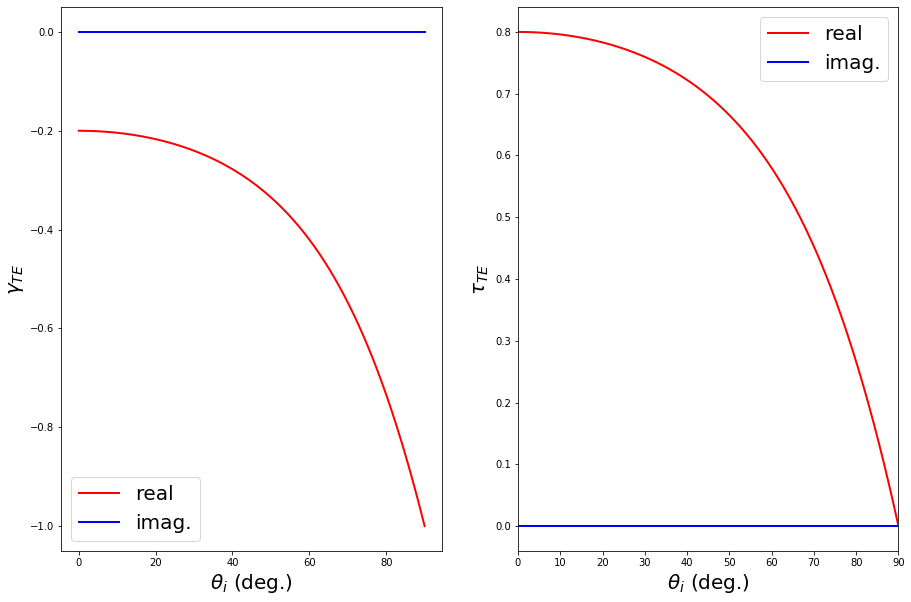

In [9]:
## plot data
fig, axes = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0].plot( theta_i*180/np.pi, np.real( r_TE ), 'r-', linewidth=2.0)
axes[0].plot( theta_i*180/np.pi, np.imag( r_TE ), 'b-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'$\gamma_{TE}$', fontsize=20)
axes[0].legend(['real', 'imag.'], fontsize=20)
plt.xlim( 0, 90);

axes[1].plot( theta_i*180/np.pi, np.real( tau_TE ), 'r-', linewidth=2.0)
axes[1].plot( theta_i*180/np.pi, np.imag( tau_TE ), 'b-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'$\tau_{TE}$', fontsize=20)
axes[1].legend(['real', 'imag.'], fontsize=20)
plt.xlim( 0, 90);

### TM mode

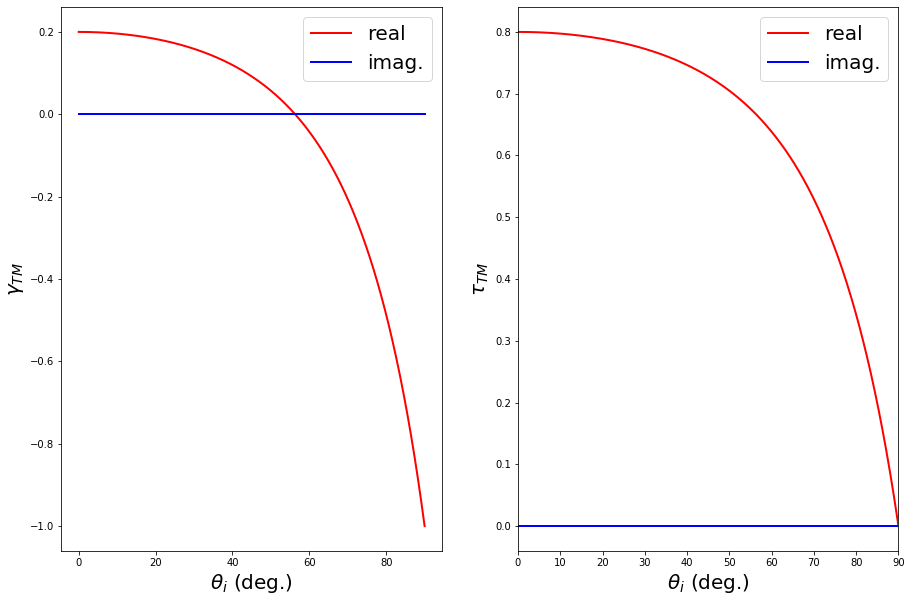

In [10]:
## plot data
fig, axes = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0].plot( theta_i*180/np.pi, np.real( r_TM ), 'r-', linewidth=2.0)
axes[0].plot( theta_i*180/np.pi, np.imag( r_TM ), 'b-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'$\gamma_{TM}$', fontsize=20)
axes[0].legend(['real', 'imag.'], fontsize=20)
plt.xlim( 0, 90);

axes[1].plot( theta_i*180/np.pi, np.real( tau_TM ), 'r-', linewidth=2.0)
axes[1].plot( theta_i*180/np.pi, np.imag( tau_TM ), 'b-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'$\tau_{TM}$', fontsize=20)
axes[1].legend(['real', 'imag.'], fontsize=20)
plt.xlim( 0, 90);

### TE v.s. TM mode

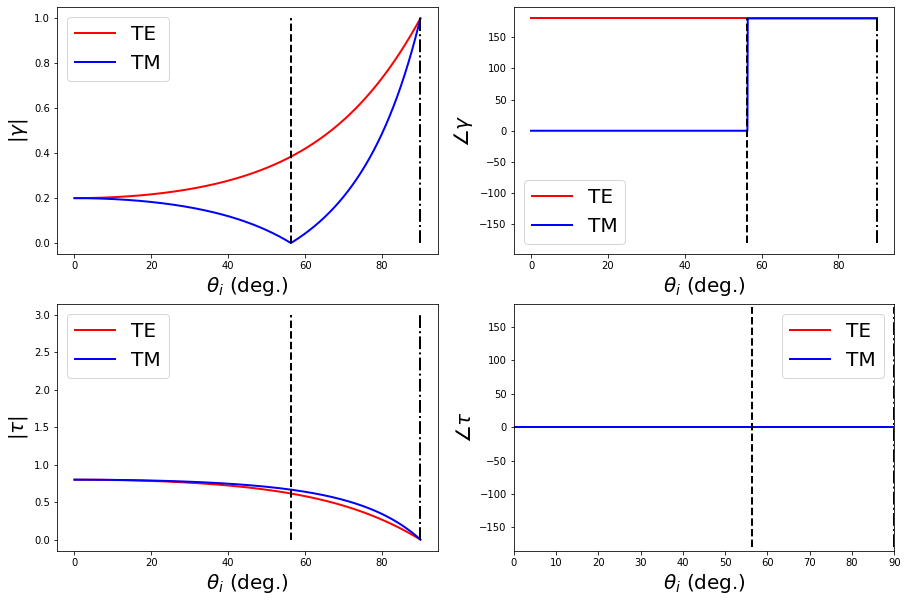

In [11]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta_i*180/np.pi, np.abs( r_TE ), 'r-', linewidth=2.0)
axes[0,0].plot( theta_i*180/np.pi, np.abs( r_TM ), 'b-', linewidth=2.0)
axes[0,0].plot( [theta_B*180/np.pi,theta_B*180/np.pi], [0,1], 'k--', linewidth=2.0)
axes[0,0].plot( [theta_C*180/np.pi,theta_C*180/np.pi], [0,1], 'k-.', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta_i*180/np.pi, np.angle( r_TE, deg=True ), 'r-', linewidth=2.0)
axes[0,1].plot( theta_i*180/np.pi, np.angle( r_TM, deg=True ), 'b-', linewidth=2.0)
axes[0,1].plot( [theta_B*180/np.pi,theta_B*180/np.pi], [-180,180], 'k--', linewidth=2.0)
axes[0,1].plot( [theta_C*180/np.pi,theta_C*180/np.pi], [-180,180], 'k-.', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta_i*180/np.pi, np.abs( tau_TE ), 'r-', linewidth=2.0)
axes[1,0].plot( theta_i*180/np.pi, np.abs( tau_TM ), 'b-', linewidth=2.0)
axes[1,0].plot( [theta_B*180/np.pi,theta_B*180/np.pi], [0,3], 'k--', linewidth=2.0)
axes[1,0].plot( [theta_C*180/np.pi,theta_C*180/np.pi], [0,3], 'k-.', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta_i*180/np.pi, np.angle( tau_TE, deg=True ), 'r-', linewidth=2.0)
axes[1,1].plot( theta_i*180/np.pi, np.angle( tau_TM, deg=True ), 'b-', linewidth=2.0)
axes[1,1].plot( [theta_B*180/np.pi,theta_B*180/np.pi], [-180,180], 'k--', linewidth=2.0)
axes[1,1].plot( [theta_C*180/np.pi,theta_C*180/np.pi], [-180,180], 'k-.', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

### Example-2

In [12]:
ni = 1.5 # refractive index of incident material
nt = 1.0 # refractive index of transmissive material
theta_i = np.linspace(0, np.pi/2, 1000)

r_TE, tau_TE = cal_r_tau_TE(theta_i, ni, nt)
r_TM, tau_TM = cal_r_tau_TM(theta_i, ni, nt)

theta_B = BrewsterAngle(ni, nt)
theta_C = CriticalAngle(ni, nt)
print( 'Brewster Angle = {0:>.2f} (deg.)'.format(theta_B*180/np.pi) )
print( 'Critical Angle = {0:>.2f} (deg.)'.format(theta_C*180/np.pi) )

Brewster Angle = 33.69 (deg.)
Critical Angle = 41.81 (deg.)


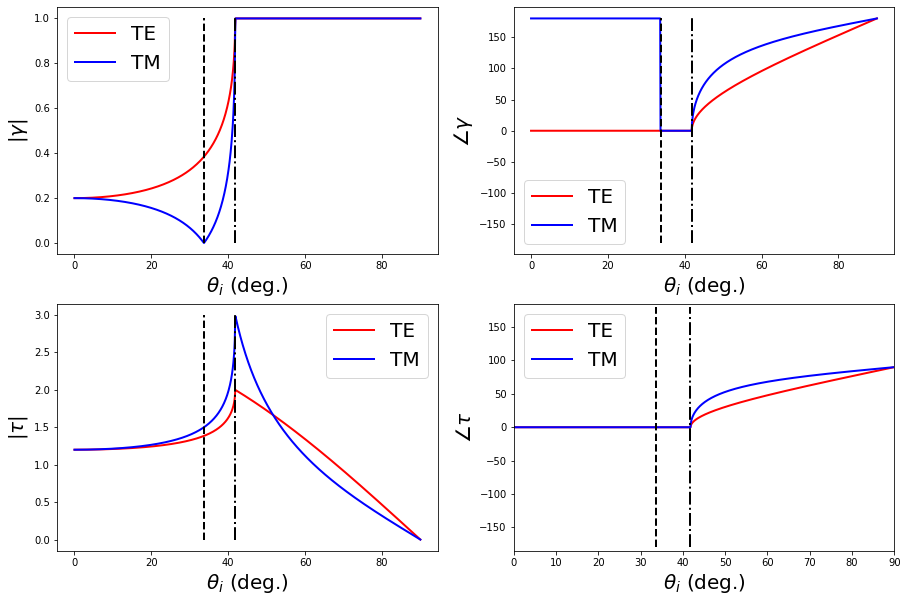

In [13]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta_i*180/np.pi, np.abs( r_TE ), 'r-', linewidth=2.0)
axes[0,0].plot( theta_i*180/np.pi, np.abs( r_TM ), 'b-', linewidth=2.0)
axes[0,0].plot( [theta_B*180/np.pi,theta_B*180/np.pi], [0,1], 'k--', linewidth=2.0)
axes[0,0].plot( [theta_C*180/np.pi,theta_C*180/np.pi], [0,1], 'k-.', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta_i*180/np.pi, np.angle( r_TE, deg=True ), 'r-', linewidth=2.0)
axes[0,1].plot( theta_i*180/np.pi, np.angle( r_TM, deg=True ), 'b-', linewidth=2.0)
axes[0,1].plot( [theta_B*180/np.pi,theta_B*180/np.pi], [-180,180], 'k--', linewidth=2.0)
axes[0,1].plot( [theta_C*180/np.pi,theta_C*180/np.pi], [-180,180], 'k-.', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta_i*180/np.pi, np.abs( tau_TE ), 'r-', linewidth=2.0)
axes[1,0].plot( theta_i*180/np.pi, np.abs( tau_TM ), 'b-', linewidth=2.0)
axes[1,0].plot( [theta_B*180/np.pi,theta_B*180/np.pi], [0,3], 'k--', linewidth=2.0)
axes[1,0].plot( [theta_C*180/np.pi,theta_C*180/np.pi], [0,3], 'k-.', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta_i*180/np.pi, np.angle( tau_TE, deg=True ), 'r-', linewidth=2.0)
axes[1,1].plot( theta_i*180/np.pi, np.angle( tau_TM, deg=True ), 'b-', linewidth=2.0)
axes[1,1].plot( [theta_B*180/np.pi,theta_B*180/np.pi], [-180,180], 'k--', linewidth=2.0)
axes[1,1].plot( [theta_C*180/np.pi,theta_C*180/np.pi], [-180,180], 'k-.', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

## The results are wrong when $\theta_i > \theta_c$ and we will deal with this in Lecture 6-2.